In [1]:
import pandas as pd
import geopandas as gpd
import folium

In [2]:
nta = gpd.read_file('data/nta/nta.shp')

In [3]:
import numpy as np
hoods = pd.read_csv("neighborhoods.csv")

In [4]:
df = hoods.dropna()

unpacked = pd.DataFrame([
    [p, t, i, j] for p, t, i, J in df.values for j in J], columns=df.columns)

ValueError: not enough values to unpack (expected 4, got 3)

In [6]:
# lst_col = "ntalist"
hoods["ntalist"] = hoods["NTA"].str.split(",")
df = hoods.dropna()

unpacked = pd.DataFrame([
    [p, t, i, j] for p, t, i, J in df.values for j in J], columns=df.columns)

In [8]:
nta1 = nta.merge(unpacked, left_on = "ntacode", right_on = "ntalist", how = "left")

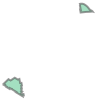

In [17]:
nta1["geometry"][0].union(nta1["geometry"][2])


In [28]:
# nta1.groupby("Unique Identifier")["geometry"].agg(union)
nta2= nta1.dissolve(by='Unique Identifier', aggfunc='sum')

In [30]:
nta2

,geometry,boro_code,shape_area,shape_leng
Unique Identifier,,,,
1.0,"POLYGON ((-73.85664 40.85812, -73.85883 40.858...",4.0,4.687849e+07,42899.293225
2.0,"POLYGON ((-74.17185 40.56152, -74.17223 40.561...",5.0,5.041082e+07,29689.395407
3.0,"POLYGON ((-73.90203 40.76742, -73.90218 40.767...",8.0,5.495511e+07,51900.954735
4.0,"POLYGON ((-74.00200 40.59413, -74.00219 40.594...",3.0,2.053462e+07,22383.743244
5.0,"MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ...",1.0,1.901430e+07,43738.499000
...,...,...,...,...
143.0,"POLYGON ((-73.84705 40.88767, -73.84744 40.886...",2.0,3.627360e+07,27351.077379
144.0,"POLYGON ((-73.94705 40.70366, -73.94754 40.703...",9.0,7.959255e+07,94271.440919
145.0,"POLYGON ((-73.98017 40.66115, -73.98021 40.661...",3.0,1.404167e+07,19033.671459


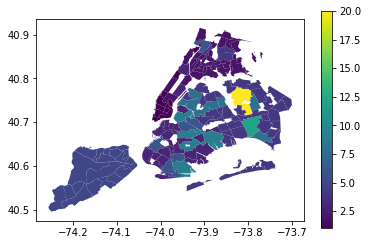

In [32]:
nta2.plot(column= "boro_code", legend=True)

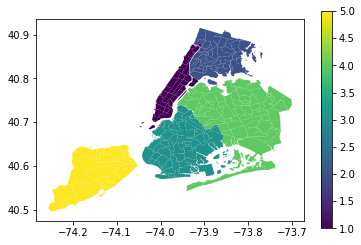

In [33]:
nta1.plot(column = "boro_code", legend = True)

In [34]:
nta2.to_file("data/geojson/combinedneighbors.geojson", driver='GeoJSON')

In [39]:
nta3 = pd.read_csv("cleaned_data/quant_features.csv")

In [46]:
nta4 = nta2.merge(nta3, left_index = True, right_on = "Unique Identifier")

In [48]:
nta4.to_file("cleaned_data/nyc.geojson", driver='GeoJSON')